In [5]:
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import ftplib
from matplotlib.dates import DateFormatter
import ipywidgets as widgets
%matplotlib widget
import os


In [6]:
#ftp server data
# hostname = "ftpupload.net"
# username = "epiz_32799455"
# pwd = "2RerU5lOOo5s9"
# folder = 'shared_files'
filename = 'flight_fares.csv'

# cwd = os.getcwd()
# print(cwd)
# print(os.listdir())

# if os.path.isfile(filename):
#     print('File found.')
# else:
#     print('File not found')

#download the file
# downloaded_filename = 'downl_'+filename
# with ftplib.FTP(hostname, username, pwd) as ftp:
#     try:
#         ftp.cwd(folder)
#         ftp.encoding = "utf-8"
#         with open(downloaded_filename, 'wb+') as f:
#             ftp.retrbinary("RETR " + filename ,f.write)
#             f.seek(0)
#             new_string = f.read().decode("utf-8") 
            
#     except:
#         print ("Error")

#print(new_string)

d:\OneDrive - Scuola Superiore Sant'Anna\Programming\python\github\flight_tracker\flight-tracker
File found.


In [3]:
df_all = pd.read_csv(filename, sep = '\t',parse_dates=['Query date'],dtype = {'Price': 'float64'}, na_values={'Price': 'Err'})
df_all = df_all.dropna()
df_list_label = [x for _, x in df_all.groupby(df_all['Label'])]
label_list = [df.iloc[0]['Label'] for df in df_list_label]
df_list_ID = [[x for _, x in df.groupby(df['ID'])] for df in df_list_label] 


    

### Ryan air monitoring app
Indicate the labels to display to plot the price evolution.
You can toggle the zoom on the lateral sidebar, and you can toggle the visibility of the lines by clicking on the legend lines.

GridBox(children=(Checkbox(value=False, description='BLQ-TFS 24-25', indent=False), Checkbox(value=False, desc…

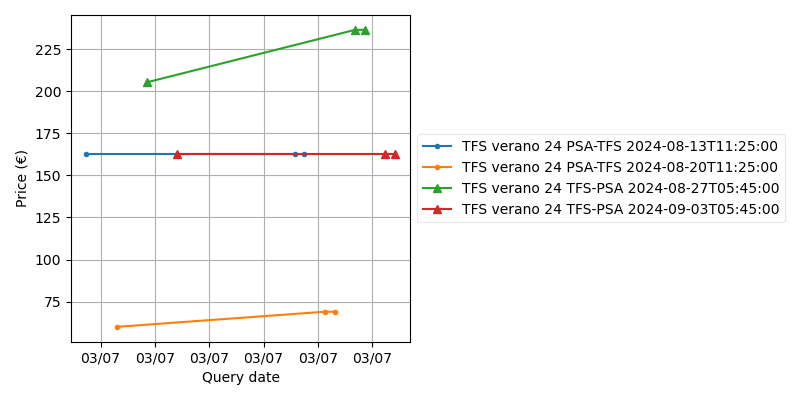

AttributeError: 'Line2D' object has no attribute '_legmarker'

AttributeError: 'Line2D' object has no attribute '_legmarker'

In [4]:


check_list = [widgets.Checkbox(value=False, description=lab, indent=False) for lab in label_list]
check_list[-1].value = True

display(widgets.GridBox(check_list, layout=widgets.Layout(grid_template_columns="repeat(3, 200px)")))

fig,ax = plt.subplots(figsize = [8,4])


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = fig.line_dict[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
        legline._legmarker.set_alpha(1)
    else:
        legline.set_alpha(0.2)
        legline._legmarker.set_alpha(0.2)
    fig.canvas.draw()



def plot_sel(change):
    ax.clear()
    line_list = []
    time_offset = 0.
    for ii, df_list in enumerate(df_list_ID):
        if check_list[ii].value:
            for df in df_list:
                tmp=df.iloc[0]
                flight_descript = f"{tmp['Label']} {tmp['Origin']}-{tmp['Destination']} {tmp['Date']}"
                if tmp['Origin'] == 'PSA' or tmp['Origin'] == 'FLR':
                    symbol = '.-'
                else:
                    symbol = '^-'
                line_list += ax.plot(df['Query date']+datetime.timedelta(0,time_offset),df['Price'],symbol,label=flight_descript)
                time_offset += 1000. #adds a small offset of 1000 seconds in the x to make coincidental points visible
    leg=ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    leg.get_frame().set_alpha(0.4)
    
    fig.line_dict = dict()
    for legline, origline in zip(leg.get_lines(), line_list):
        #legline.set_picker(5)  # 5 pts tolerance
        legline.set_picker(True)
        legline.set_pickradius(5)  # 5 pts tolerance
        fig.line_dict[legline] = origline
    
    ax.grid('True')
    ax.set_xlabel('Query date')
    ax.set_ylabel('Price (€)')
    ax.xaxis.set_major_formatter(DateFormatter('%d/%m'))
    fig.tight_layout()
    fig.canvas.mpl_connect('pick_event', onpick)

    


plot_sel(None)
[cl.observe(plot_sel) for cl in check_list]

None

# link_to_view_edit = 'https://docs.google.com/spreadsheets/d/1U3UlqFHcbvpml8QwxAMaEMRqDGM2bqYO?rtpof=true&authuser=claudiooton%40gmail.com&usp=drive_fs'
# #link = widgets.HTML('Link to change flight monitor table:')
# link = widgets.HTML(value="<a href=""https://docs.google.com/spreadsheets/d/1U3UlqFHcbvpml8QwxAMaEMRqDGM2bqYO?rtpof=true&authuser=claudiooton%40gmail.com&usp=drive_fs"" target=""_blank"">Click here to edit flight monitor table</a>")

# #display(text)
# display(link)


<a href="https://docs.google.com/spreadsheets/d/1U3UlqFHcbvpml8QwxAMaEMRqDGM2bqYO?rtpof=true&authuser=claudiooton%40gmail.com&usp=drive_fs" target="_blank">Click here to edit flight monitor table</a>